# Analyze Titanic data. 
I. Start with basic EDA (Exploratory data analysis): 

1. Compute average `Age` of passengers and number of passengers who survived and not survived grouped by `Sex` and `Passenger Class` (24 numbers);

2. What can you say about survivors based on the resulting table (open question), e.g. what is the surviving ratio for females in First class compared to the Second and Third? This answer is limited to 150 words.

3. What is the average number of males and females on all boats (rounded to the closest integer)? 

Do not forget to filter out all `?` in `Life Boat` attribute. 


In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv("titanic_data.csv")
df.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No


In [21]:
round(df.groupby(["Sex","Survived","Passenger Class"])["Age"].mean(),2)

Sex     Survived  Passenger Class
Female  No        First              35.20
                  Second             34.09
                  Third              23.42
        Yes       First              37.11
                  Second             26.71
                  Third              20.81
Male    No        First              43.66
                  Second             33.09
                  Third              26.68
        Yes       First              36.17
                  Second             17.45
                  Third              22.44
Name: Age, dtype: float64

In [6]:
survived = df.groupby(["Sex","Survived","Passenger Class"])["Name"].count()
survived

Sex     Survived  Passenger Class
Female  No        First                5
                  Second              12
                  Third              110
        Yes       First              139
                  Second              94
                  Third              106
Male    No        First              118
                  Second             146
                  Third              418
        Yes       First               61
                  Second              25
                  Third               75
Name: Name, dtype: int64

In [9]:
print("Female survived ratio in ")
for ind in list(["First", "Second", "Third"]):
    print(ind + " class: " + str(survived.loc[("Female","Yes",ind)] / survived.loc[("Female","No",ind)]))

Female survived ratio in 
First class: 27.8
Second class: 7.833333333333333
Third class: 0.9636363636363636


In [10]:
survived[[1]]

Sex     Survived  Passenger Class
Female  No        Second             12
Name: Name, dtype: int64

In [11]:
df_onboat = df.dropna(axis='index', how='any', subset=['Life Boat'])
df_onboat['Life Boat'].unique()

array(['2', '11', '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5', '7',
       'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [14]:
female_onboat = df_onboat.groupby(["Sex","Life Boat"])["Name"].count().loc[("Female")].mean()
male_onboat = df_onboat.groupby(["Sex","Life Boat"])["Name"].count().loc[("Male")].mean()
print(round(female_onboat), round(male_onboat))

14 7


# What can you say about survivors based on the resulting table (open question). This answer is imited to 150 word


# II. Proceed with feature generation.
1. Drop the column `Life Boat`.
2. Generate new attribute `Family size` (sum up `No of Parents or Children on Board` and `No of Siblings or Spouses on Board`). What is the average family size? In which class did the biggest family travel?
Do not drop original attributes.
3. It seems that `Passenger Fare` is total among all passengers with the same `Ticket Number`: create new attribute `Single passenger fare`. For every passenger you need to compute the number of passengers with the same `Ticket Number` and then use this number as a divisor for `Passenger Fare`. 
Do not drop the original attribute.
4. Impute missing values: for numerical attributes use averaging over three groups: `Passenger Class`, `Sex`, `Embarkation Port`; for every numerical attribute create separate column that contain 1 for imputed value and 0 for originally presented. 
This step is mainly for practicing your groupby/join skills. In real tasks this kind of imputation is relatively rare.
5. Pre-process categorical attributes: For every categorical attribute create a separate column that contains 1 for imputed value and 0 for originally presented. One-hot encode categorical attributes with less than 20 unique values, drop other categorical attributes; drop original attributes. 
6. Set the role of the `Survived` attribute to `label`.


In [27]:
del df["Life Boat"]

In [28]:
df["Family size"] = df["No of Parents or Children on Board"] + df["No of Siblings or Spouses on Board"] + 1

In [29]:
df["Family size"].mean()

1.8838808250572956

In [32]:
df[df["Family size"] == df["Family size"].max()]

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Survived,Family size
1170,Third,"Sage, Master. Thomas Henry",Male,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1171,Third,"Sage, Master. William Henry",Male,14.5,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1172,Third,"Sage, Miss. Ada",Female,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1173,Third,"Sage, Miss. Constance Gladys",Female,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1174,Third,"Sage, Miss. Dorothy Edith 'Dolly'",Female,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1175,Third,"Sage, Miss. Stella Anna",Female,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1176,Third,"Sage, Mr. Douglas Bullen",Male,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1177,Third,"Sage, Mr. Frederick",Male,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1178,Third,"Sage, Mr. George John Jr",Male,NaN,8,2,CA. 2343,69.55,NaN,Southampton,No,11
1179,Third,"Sage, Mr. John George",Male,NaN,1,9,CA. 2343,69.55,NaN,Southampton,No,11


In [33]:
df_ticket_number = df['Ticket Number'].value_counts().to_frame().reset_index().rename(columns={'index':'Ticket Number', 'Ticket Number':'Ticket count'})
df = pd.merge(df, df_ticket_number, on='Ticket Number')
df["Single passenger fare"] = df["Passenger Fare"] / df["Ticket count"]
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Survived,Family size,Ticket count,Single passenger fare
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,Yes,1,4,52.834375
1,First,"Kreuchen, Miss. Emilie",Female,39.0000,0,0,24160,211.3375,NaN,Southampton,Yes,1,4,52.834375
2,First,"Madill, Miss. Georgette Alexandra",Female,15.0000,0,1,24160,211.3375,B5,Southampton,Yes,2,4,52.834375
3,First,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",Female,43.0000,0,1,24160,211.3375,B3,Southampton,Yes,2,4,52.834375
4,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,Yes,4,6,25.258333
5,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,No,4,6,25.258333
6,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,No,4,6,25.258333
7,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,No,4,6,25.258333
8,First,"Cleaver, Miss. Alice",Female,22.0000,0,0,113781,151.5500,NaN,Southampton,Yes,1,6,25.258333
9,First,"Daniels, Miss. Sarah",Female,33.0000,0,0,113781,151.5500,NaN,Southampton,Yes,1,6,25.258333


In [35]:
round(df.groupby(["Passenger Class"])["Single passenger fare"].mean(),2)

Passenger Class
First     33.91
Second    11.41
Third      7.33
Name: Single passenger fare, dtype: float64

In [36]:
numerical = ['Age', 'No of Siblings or Spouses on Board',
             'No of Parents or Children on Board', 'Passenger Fare',
             'Family size', 'Ticket count', 'Single passenger fare']

fill_pivot = pd.pivot_table(df,
                            values=numerical,
                            index=['Passenger Class', 'Sex', 'Port of Embarkation'])


In [37]:
def fill(col):
    for index in df.index:
        index1 = df.loc[index, 'Passenger Class']
        index2 = df.loc[index, 'Sex']
        index3 = df.loc[index, 'Port of Embarkation']
        if math.isnan(df.loc[index, col]):
            df.loc[index, col] = fill_pivot.loc[(index1, index2, index3), col]
            df.loc[index, col + suffix] = 1

suffix = '_modified'
for col in numerical:
    df[col + suffix] = 0

for col in numerical:
    fill(col)

In [44]:
len(df.columns)

2727

In [42]:
categorical = ['Passenger Class', 'Sex', 'Port of Embarkation',
               "Name", "Ticket Number", "Passenger Fare",
               "Cabin", "Survived"]

for col in categorical:
    dummies = pd.get_dummies(df[col])
    dummies = dummies.rename(
        {str(i): str(col) + '_' + str(i) for i in dummies.columns}, axis=1
    )
    df = pd.merge(df, dummies, left_index=True, right_index=True, suffixes=('', '_'+col))


df = df.drop(columns = categorical)

In [43]:
len(df.columns)

2727

In [45]:
del df["Survived_No"]

# Compute classification accuracy on a train-test setup:
1. Create a Cross Validation block, fix the random_state parameter to 2020.
2. Use a decision tree with `maximal depth` = 7; uncheck `apply pruning` box; leave all other parameters by default.
3. Use accuracy as a performance metric
4. Analyze the resulting confusion matrix, which error is larger: Type I or Type II? 
5. Provide a short analysis of the results, based on your answers III.2-III.3. E.g. What are the splitting features of the first 3 levels of the best tree (up to 7 attributes)? Do these results coincide with your intuition? You may include some misclassified examples along with explanations why they were misclassified. 


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [58]:
X = df.drop(columns = ['Survived_Yes'])
y = df['Survived_Yes']
model = DecisionTreeClassifier(random_state=2020, max_depth=7)
print(cross_val_score(model, X, y, cv=5))
print(round(cross_val_score(model, X, y, cv=5).mean(), 2))

[0.51145038 0.8129771  0.65267176 0.67175573 0.65517241]
0.66


In [61]:
model.fit(X, y)
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred)
accuracies = cross_val_score(estimator=model, X=X, y=y, cv=5, scoring='accuracy')

In [62]:
round(accuracies.mean(),2)

0.66

In [63]:
round(accuracies.std(),2)

0.1

In [64]:
print(cm)


[[753  56]
 [100 400]]


[Text(154.966,210.412,'X[17] <= 0.5\nentropy = 0.472\nsamples = 1309\nvalue = [809, 500]'),
 Text(81.948,182.358,'X[15] <= 0.5\nentropy = 0.397\nsamples = 466\nvalue = [127, 339]'),
 Text(33.6197,154.303,'X[2618] <= 0.5\nentropy = 0.127\nsamples = 250\nvalue = [17, 233]'),
 Text(28.0164,126.248,'X[2112] <= 0.5\nentropy = 0.114\nsamples = 248\nvalue = [15, 233]'),
 Text(22.4131,98.1925,'X[559] <= 0.5\nentropy = 0.1\nsamples = 246\nvalue = [13, 233]'),
 Text(16.8098,70.1375,'X[1499] <= 0.5\nentropy = 0.093\nsamples = 245\nvalue = [12, 233]'),
 Text(11.2066,42.0825,'X[246] <= 0.5\nentropy = 0.086\nsamples = 244\nvalue = [11, 233]'),
 Text(5.60328,14.0275,'entropy = 0.079\nsamples = 243\nvalue = [10, 233]'),
 Text(16.8098,14.0275,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(22.4131,42.0825,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(28.0164,70.1375,'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(33.6197,98.1925,'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(39.2

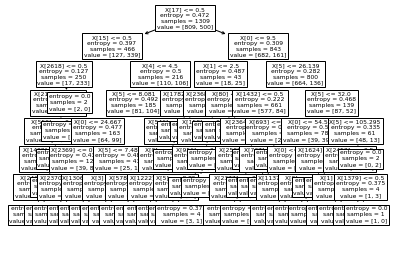

In [96]:
%matplotlib inline
from sklearn import tree
tree.plot_tree(model,fontsize=6)

In [98]:
print("1lvl")
print(X.columns[17])
print("2lvl") 
print(X.columns[15], X.columns[0])
print("3lvl") 
print(X.columns[2618], X.columns[4], X.columns[1], X.columns[5])

1lvl
Sex_Male
2lvl
Passenger Class_Third Age
3lvl
Cabin_C22 C26 Ticket count No of Siblings or Spouses on Board Single passenger fare


# What are the splitting features of the first 3 levels of the best tree (up to 7 attributes)? Do these results coincide with your intuition? You may include some misclassified examples along with explanations why they were misclassified. 